In [0]:
def downloadAndProcessData():
  import os
  import zipfile
  !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip
  local_zip = '/tmp/cats_and_dogs_filtered.zip'
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()
  base_dir = '/tmp/cats_and_dogs_filtered'
  train_dir = os.path.join(base_dir, 'train')
  validation_dir = os.path.join(base_dir, 'validation')

  return train_dir, validation_dir

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def makeModel():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  model.summary()
  return model

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def trainModel(model, train_dir, validation_dir):
  model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-3), metrics=['accuracy'])
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )
  test_datagen = ImageDataGenerator(rescale=1./255)
  train_gen = train_datagen.flow_from_directory(
      train_dir,
      target_size=(150,150),
      batch_size=20,
      class_mode='binary'
  ) 
  test_gen = test_datagen.flow_from_directory(
      validation_dir,
      target_size=(150,150),
      batch_size=20,
      class_mode='binary'
  )
  history = model.fit(train_gen, epochs=75, validation_data=test_gen, verbose=2)
  return history

In [17]:
train_dir, valid_dir = downloadAndProcessData()
model = makeModel()
history = trainModel(model, train_dir, valid_dir)

--2020-06-15 19:17:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2020-06-15 19:17:58 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_____________________________________________

In [0]:
def plotHistory(history):
  import matplotlib.pyplot as plt
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title("Accuracy")
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title("Loss")
  plt.legend()

  plt.show()


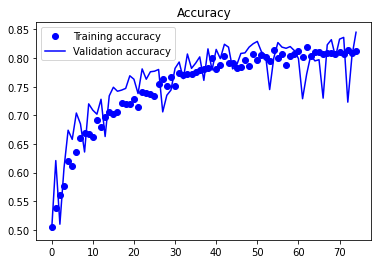

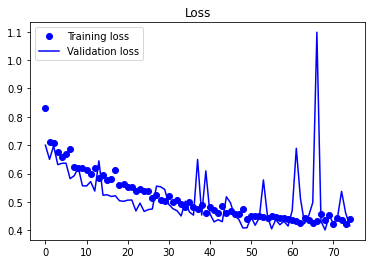

In [19]:
plotHistory(history)